# HR Analytics: Ecommerce Customer Churn
### Created By : Balya Elfata

# Part 1 : Business Problem

## Business Problem Understanding

**Busniness Context**  
E-commerce merupakan sebuah perkembangan teknologi di bidang bisnis yang melibatkan promosi, pembelian dan pemasaran produk melalui media elektronik atau internet. E-commerce merupakan penerapan dari bisnis elektronik yang cukup efisien dengan persaingan yang ketat untuk menawarkan produk yang menarik kepada pelanggan mereka. Bahkan, sering terjadi akuisisi pelanggan antar perusahaan. Pelanggan yang berhenti menggunakan platform e-commerce perusahaan dan beralih ke platform elektronik lainnya dikenal sebagai *churn*. Pelanggan merupakan aset terpenting bagi perusahaan sebagai sumber keuntungan dari perusahaan. Maka dari itu, perusahaan memerlukan strategi bisnis yang baik untuk mencegah churn.

Target :

0 : Pelanggan Tidak Churn

1 : Pelanggan Churn

**Problem Statement :**

Proses treatment pelanggan yang akan churn bisa memakan waktu dan sumber daya jika perusahaan menargetkan semua pelanggan tanpa melakukan penyaringan terlebih dahulu. Perusahaan ingin meningkatkan efisiensi promosi dengan mengetahui pelanggan mana yang akan churn sehingga memfokuskan promosi ke mereka. 

Jika promosi diberikan kepada semua pelanggan, maka biaya promosi tersebut akan menjadi sia-sia jika pelanggan tersebut memang tidak berniat untuk churn.

**Goals :**

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan seorang pelanggan untuk churn, sehingga dapat memfokuskan promosi pada pelanggan yang ingin churn saja.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang pelanggan ingin churn, sehingga mereka dapat membuat strategi bisnis yang lebih baik dalam treatment pelanggan.

**Analytic Approach :**

Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan pelanggan yang akan churn dan yang tidak akan churn.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas seorang pelanggan akan churn atau tidak.

# Part 2 : Data Understanding and Data Cleaning

### Import Libraries

In [67]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

## Data Understanding

### Attribute Information

| Attribute | Data Type | Description |
| --- | --- | --- |
| Tenure	| Float	| Tenure of customer in ecommerce company |
| WarehouseToHome |	Float |	Distance in between warehouse to home of customer |
| NumberOfDeviceRegistered |	Integer |	Total number of devices registered on particular customer |
| PreferedOrderCat |	Text |	Preferred order category of customer in last month |
| SatisfactionScore |	Integer |	Satisfactory score of customer on service |
| MaritalStatus |	Text |	Marital status of customer |
| NumberOfAddress |	Integer |	Total number of address added on particular customer |
| Complain |	Integer |	Any complaint has been raised in last month |
| DaySinceLastOrder |	Float |	Day Since last order by customer |
| CashbackAmount |	Float |	Average cashback in last month |
| Churn |	Boolean |	Churn Flag |

Dataset source : https://drive.google.com/file/d/1Ipw3ZtQGEPTqkclBTmi_bA2Raor93UMr/view

### Reading Data

In [68]:
!gdown 1Ipw3ZtQGEPTqkclBTmi_bA2Raor93UMr

Downloading...
From: https://drive.google.com/uc?id=1Ipw3ZtQGEPTqkclBTmi_bA2Raor93UMr
To: /content/data_ecommerce_customer_churn.csv
100% 207k/207k [00:00<00:00, 73.5MB/s]


In [69]:
#Load Dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [70]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [71]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Tenure,float64,194,4.92,36,"[61.0, 60.0]"
1,WarehouseToHome,float64,169,4.29,33,"[5.0, 13.0]"
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[2, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Mobile, Fashion]"
4,SatisfactionScore,int64,0,0.00,5,"[1, 4]"
5,MaritalStatus,object,0,0.00,3,"[Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[8, 11]"
7,Complain,int64,0,0.00,2,"[1, 0]"
8,DaySinceLastOrder,float64,213,5.40,22,"[6.0, 8.0]"
9,CashbackAmount,float64,0,0.00,2335,"[209.74, 127.42]"


Berdasarkan informasi diatas diketahui bahwa dalam dataset terdapat 11 kolom dan 5624 baris. Dengan komposisi sebagai berikut:

- 2 data bertipe object
- 4 data bertipe integer
- 4 data bertipe float, dan
- 1 data bertipe boolean. (Churn)

Terdapat beberapa variabel yang memiliki missing value, yaitu:

- Tenure (4.92 %)
- WarehouseToHome (4.29 %)
- DaySinceLastOrder (5.4 %)

Kebanyakan dari variabel ini adalah variabel continous sehingga missing value perlu diberikan perlakuan agar siap digunakan dalam model machine learning.

## Data Cleaning

Ada data yang hilang/kosong di beberapa fitur/kolom. Maka dari itu, kita akan memperbaiki semua datanya dan membuatnya menjadi siap pakai untuk melakukan analisis terhadap masalahnya dan juga pembuatan model machine learningnya.

### Duplicated Data

In [72]:
# Check for Duplicates
df[df.duplicated()]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
70,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
128,1.0,10.0,4,Mobile Phone,1,Single,3,1,1.0,140.69,1
194,18.0,26.0,3,Laptop & Accessory,3,Single,9,0,1.0,148.50,0
253,19.0,6.0,3,Fashion,5,Married,2,0,7.0,204.53,0
289,16.0,36.0,4,Laptop & Accessory,3,Married,4,0,3.0,170.56,0
...,...,...,...,...,...,...,...,...,...,...,...
3930,22.0,17.0,3,Laptop & Accessory,1,Single,4,0,4.0,145.07,0
3932,20.0,15.0,5,Laptop & Accessory,5,Married,10,1,8.0,171.15,0
3934,10.0,25.0,3,Laptop & Accessory,3,Married,4,0,2.0,157.68,0
3938,30.0,6.0,5,Laptop & Accessory,3,Married,3,1,2.0,156.60,0


tanpa adanya id transaksi ataupun id pelanggan, kita tidak bisa memastikan data duplikat di atas merupakan data duplikat asli atau hanya transaksi yang diulang pelanggan.

Maka dari itu, tidak diperlukan perlakuan khusus terhadap data duplikat.

### Missing Value

Missing Values dapat dikategorikan dalam 3 jenis:
- **Missing at Random (MAR)**: Data yang hilang pada suatu variabel terkait dengan beberapa variabel terukur lainnya dalam model analisis, tetapi tidak terkait dengan nilai variabel itu sendiri.
- **Missing Completely at Random (MCAR)**: Data yang hilang pada suatu variabel tidak terkait dengan variabel terukur lainnya dan tidak terkait dengan nilai variabel itu sendiri.
- **Missing Not at Random (MNAR)**: Data yang hilang pada suatu variabel terkait dengan nilai variabel itu sendiri, bahkan setelah mengontrol variabel lain.

#### Bar Plot

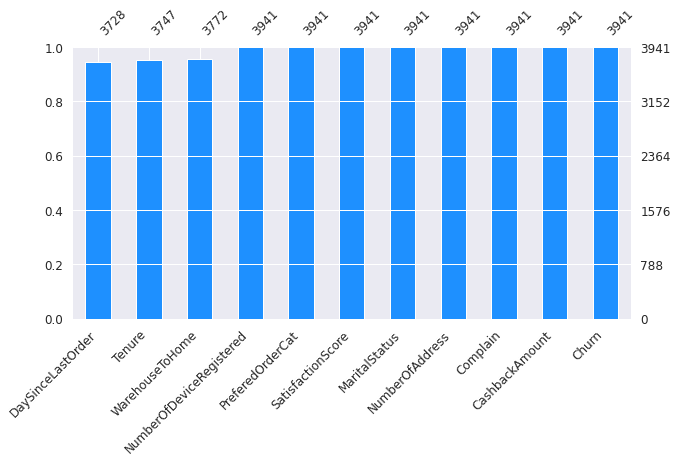

In [73]:
# Bar Plot
missingno.bar(df,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12);

Terlihat dari Bar Plot tersebut, bahwa kolom DaySinceLastOrder, Tenure, dan WarehouseToHome memiliki missing values atau data yang hilang. (informasi ini sebenarnya dapat dilihat juga di tabel di atas)

Kemudian berdasarkan Bar Plot tersebut juga, kolom DaySinceLastOrder adalah kolom yang memiliki data yang hilang terbanyak, sedangkan kolom WarehouseToHome memiliki hanya sedikit saja data yang hilang.

#### Matrix Plot

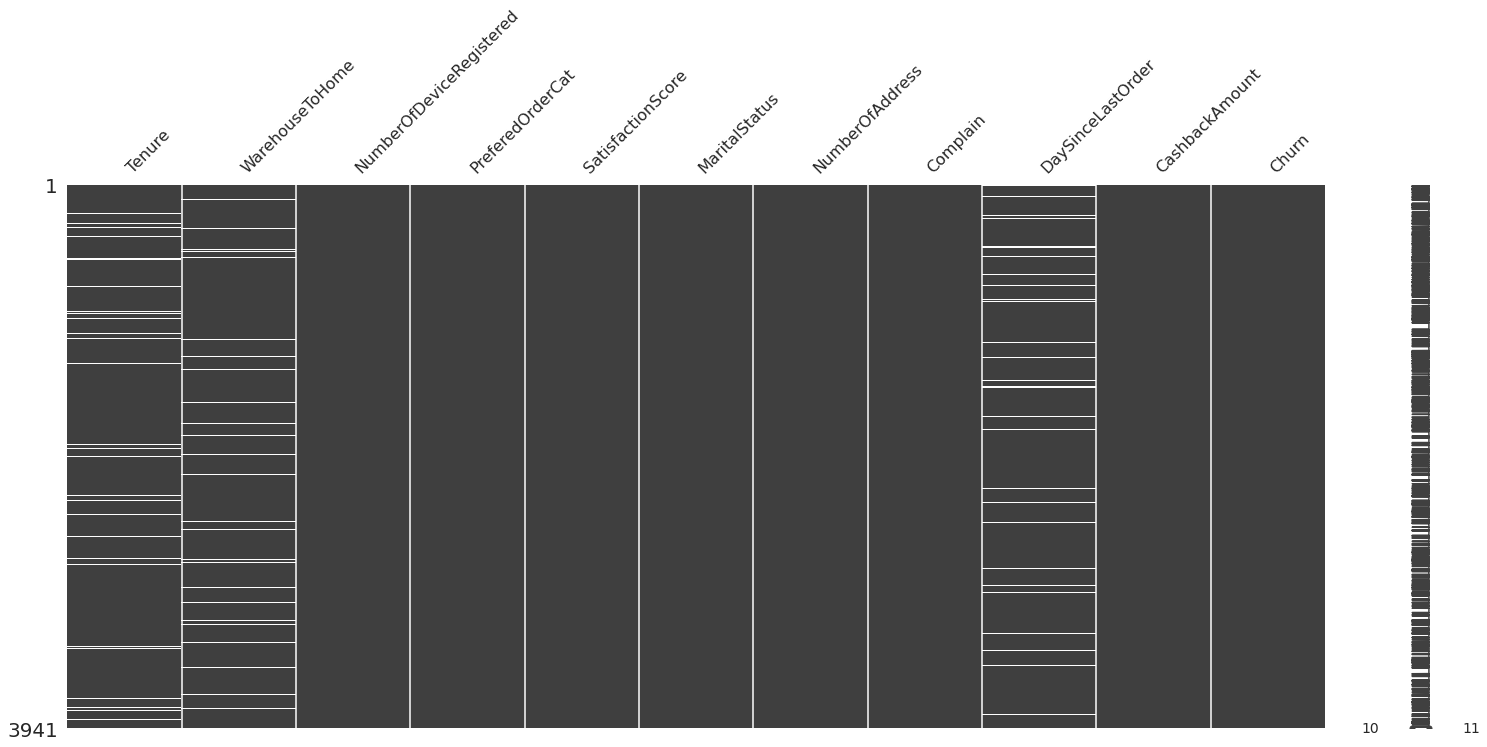

In [74]:
# Matrix Plot
missingno.matrix(df)

Terlihat bahwa missing value/data yang hilang pada setiap kolom memiliki pola yang cukup acak. 

#### Heatmap

Di bawah ini kita memplot Heatmap yang menunjukkan korelasi nulitas antara berbagai kolom yang memiliki data yang hilang pada dataset kita.

Korelasi nulitas berkisar dari -1 hingga 1.

- -1 - Korelasi Negatif yang menyatakan bahwa jika nilai satu variabel ada maka nilai variabel lain pasti tidak ada.
- 0 - Tidak ada korelasi yang menyatakan bahwa nilai variabel yang ada atau tidak ada tidak berpengaruh satu sama lain.
- 1 - Korelasi Positif yang menyatakan bahwa jika nilai satu variabel ada maka nilai yang lain pasti ada

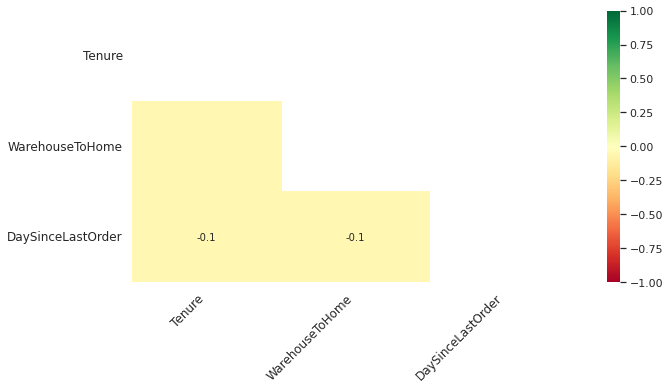

In [75]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

Terlihat dari Heatmap tersebut bahwa missing values atau data yang hilang antara 1 kolom dengan kolom yang lainnya itu tidak berhubungan/berkorelasi.

#### Statistik Missing Values

In [76]:
df[df['DaySinceLastOrder'].isna() == True].describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,0.0,213.000000,213.000000
mean,11.530516,15.647887,4.103286,2.915493,4.877934,0.272300,NaN,220.923052,0.187793
std,8.281330,8.079963,0.894764,1.418342,2.606981,0.446192,NaN,6.621594,0.391467
min,0.000000,6.000000,1.000000,1.000000,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,2.000000,3.000000,0.000000,NaN,214.980000,0.000000
50%,10.000000,14.000000,4.000000,3.000000,4.000000,0.000000,NaN,221.690000,0.000000
75%,17.000000,19.000000,5.000000,4.000000,6.000000,1.000000,NaN,227.090000,0.000000
max,31.000000,36.000000,6.000000,5.000000,11.000000,1.000000,NaN,231.420000,1.000000


In [77]:
df[df['DaySinceLastOrder'].isna() == True][['PreferedOrderCat','MaritalStatus']].value_counts()

PreferedOrderCat    MaritalStatus
Fashion             Married          92
                    Single           50
                    Divorced         24
Laptop & Accessory  Married          20
                    Single           11
Grocery             Married           9
Laptop & Accessory  Divorced          4
Grocery             Divorced          2
                    Single            1
dtype: int64

In [78]:
df[(df['Tenure'].isna() == True)].describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,194.000000,194.00000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,NaN,14.556701,3.28866,3.180412,3.144330,0.257732,2.025773,120.363660,0.329897
std,NaN,7.714422,0.80102,1.284998,2.332424,0.438517,2.328992,2.737009,0.471392
min,NaN,6.000000,1.00000,1.000000,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.00000,3.000000,2.000000,0.000000,0.000000,120.220000,0.000000
50%,NaN,13.000000,3.00000,3.000000,2.000000,0.000000,2.000000,121.070000,0.000000
75%,NaN,19.000000,4.00000,4.000000,4.000000,1.000000,3.000000,122.175000,1.000000
max,NaN,34.000000,5.00000,5.000000,19.000000,1.000000,13.000000,123.130000,1.000000


In [79]:
df[df['Tenure'].isna() == True][['PreferedOrderCat','MaritalStatus']].value_counts()

PreferedOrderCat    MaritalStatus
Mobile              Married          78
                    Single           48
                    Divorced         25
Mobile Phone        Single           20
                    Married          11
Laptop & Accessory  Married           4
Mobile Phone        Divorced          4
Laptop & Accessory  Divorced          2
                    Single            2
dtype: int64

In [80]:
df[df['WarehouseToHome'].isna() == True].describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,169.000000,0.0,169.000000,169.00000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,6.337278,NaN,3.201183,3.08284,3.514793,0.301775,2.461538,124.584793,0.355030
std,7.480043,NaN,0.849229,1.44922,2.526306,0.460392,2.712405,0.987585,0.479944
min,0.000000,NaN,1.000000,1.00000,1.000000,0.000000,0.000000,123.180000,0.000000
25%,0.000000,NaN,3.000000,2.00000,2.000000,0.000000,0.000000,123.720000,0.000000
50%,4.000000,NaN,3.000000,3.00000,2.000000,0.000000,2.000000,124.390000,0.000000
75%,11.000000,NaN,4.000000,4.00000,5.000000,1.000000,3.000000,125.590000,1.000000
max,30.000000,NaN,5.000000,5.00000,10.000000,1.000000,15.000000,126.570000,1.000000


In [81]:
df[df['WarehouseToHome'].isna() == True][['PreferedOrderCat','MaritalStatus']].value_counts()

PreferedOrderCat    MaritalStatus
Mobile              Married          70
                    Single           68
                    Divorced         24
Laptop & Accessory  Married           4
                    Single            2
                    Divorced          1
dtype: int64

Analisis:
- Data kosong pada fitur `DaySinceLastOrder` memiliki 
jumlah Cashback lebih banyak daripada fitur lainnya. yaitu pada rentang 209.34 - 231.42. Data kosongnya sebagian besar ditemukan di kategori Fashion.
- Data kosong pada fitur `WarehouseToHome` hanya ditemukan di kategori Mobile dan Laptop & Accessory di mana data kosong sebagian besar berada di kategori Mobile.
- Data kosong pada fitur `Tenure` sebagian besar ditemukan di kategori Mobile dan Mobile Phone.
- Urutan data kosong berdasarkan status pernikahannya dari yang terbanyak adalah menikah, single, lalu cerai. Hal ini dikarenakan banyaknya jumlah data pada ketiga status tersebut memiliki urutan yang sama.
- Data kosong pada dataset ini dapat dikategorikan Missing Not At Random (MNAR) karena dipengaruhi oleh kolom lainnya.

#### Handling Missing Values

In [82]:
# Handling Missing Value Fitur DaySinceLastOrder
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df[(df['CashbackAmount'] >= 209.34) & (df['CashbackAmount'] <= 231.42)]['DaySinceLastOrder'].median())

In [83]:
# Handling Missing Value Fitur Tenure
df['Tenure'] = df['Tenure'].fillna(df[(df['PreferedOrderCat'] == 'Mobile') | (df['PreferedOrderCat'] == 'Mobile Phone')]['Tenure'].median())

In [84]:
# Handling Missing Value Fitur WarehouseToHome
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df[df['PreferedOrderCat'] == 'Mobile']['WarehouseToHome'].median())

In [85]:
df.isna().sum()

Tenure                      0
WarehouseToHome             0
NumberOfDeviceRegistered    0
PreferedOrderCat            0
SatisfactionScore           0
MaritalStatus               0
NumberOfAddress             0
Complain                    0
DaySinceLastOrder           0
CashbackAmount              0
Churn                       0
dtype: int64

Dataset sudah tidak memiliki data kosong.

### Outliers

In [86]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn']))]

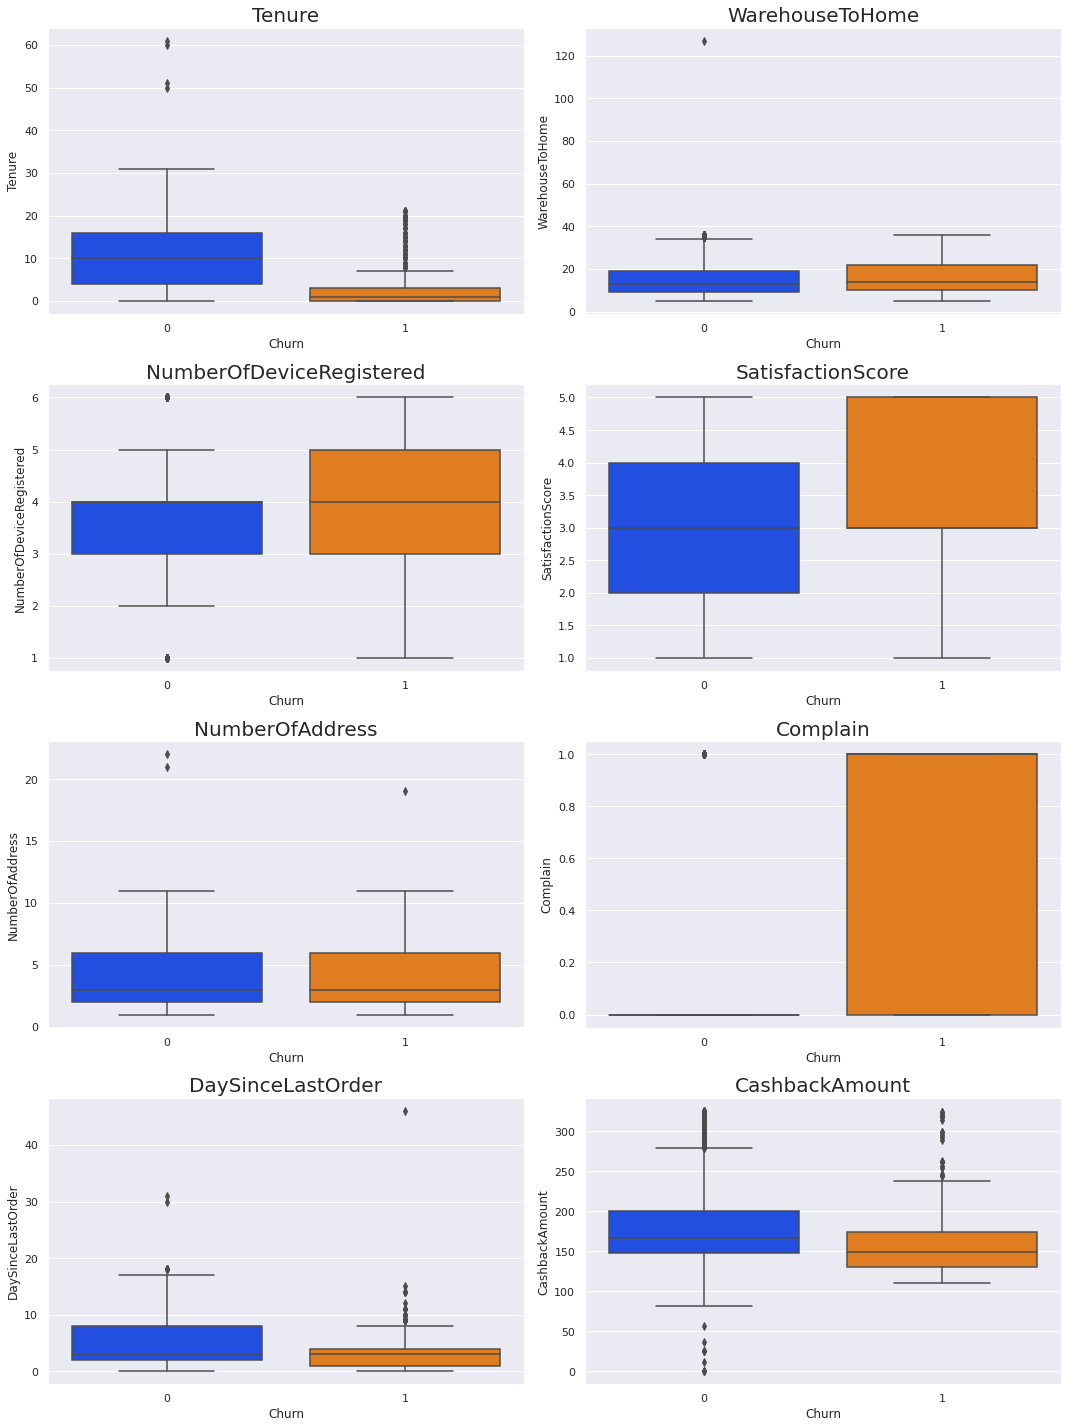

In [87]:
plt.figure(figsize=(15, 20))
# sns.set(style='whitegrid')
sns.set(palette='bright')
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(4, 2, plotnumber)
    sns.boxplot(data=df,y=feature, x='Churn')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout();

Kehadiran outlier dapat memengaruhi model machine learning, tetapi outlier tidak selalu harus dihilangkan. Kehadiran outlier dalam data tidak berarti bahwa data tersebut buruk. Kehadiran outlier dapat mengandung informasi yang berguna yang dapat digunakan dalam analisis data.

Kita hanya akan menghapus outlier dengan nilai paling ekstrem, karena jika menghapus semua outlier akan menyisakan data yang sangat sedikit sehingga tidak mewakili data sebenarnya.

Dengan melihat grafik box plot, terlihat bahwa fitur `WarehouseToHome`, `DaySinceLastOrder`, `NumberOfAddress`, dan `Tenure` memiliki outliers yg cukup ekstrem nilainya dibanding data yang lain. Maka hanya data tersebut yang akan kita hilangkan, sedangkan untuk outliers lainnya kita biarkan.

#### Handling Outliers

In [88]:
# Menghapus outlier pada fitur WarehouseToHome
df = df.drop(df[df['WarehouseToHome']>= 120].index) 

In [89]:
# Menghapus outlier pada fitur DaySinceLastOrder
df = df.drop(df[df['DaySinceLastOrder']>= 25].index) 

In [90]:
# Menghapus outlier pada fitur NumberOfAddress
df = df.drop(df[df['NumberOfAddress']>= 15].index) 

In [91]:
# Menghapus outlier pada fitur Tenure
df = df.drop(df[df['Tenure']>= 40].index) 

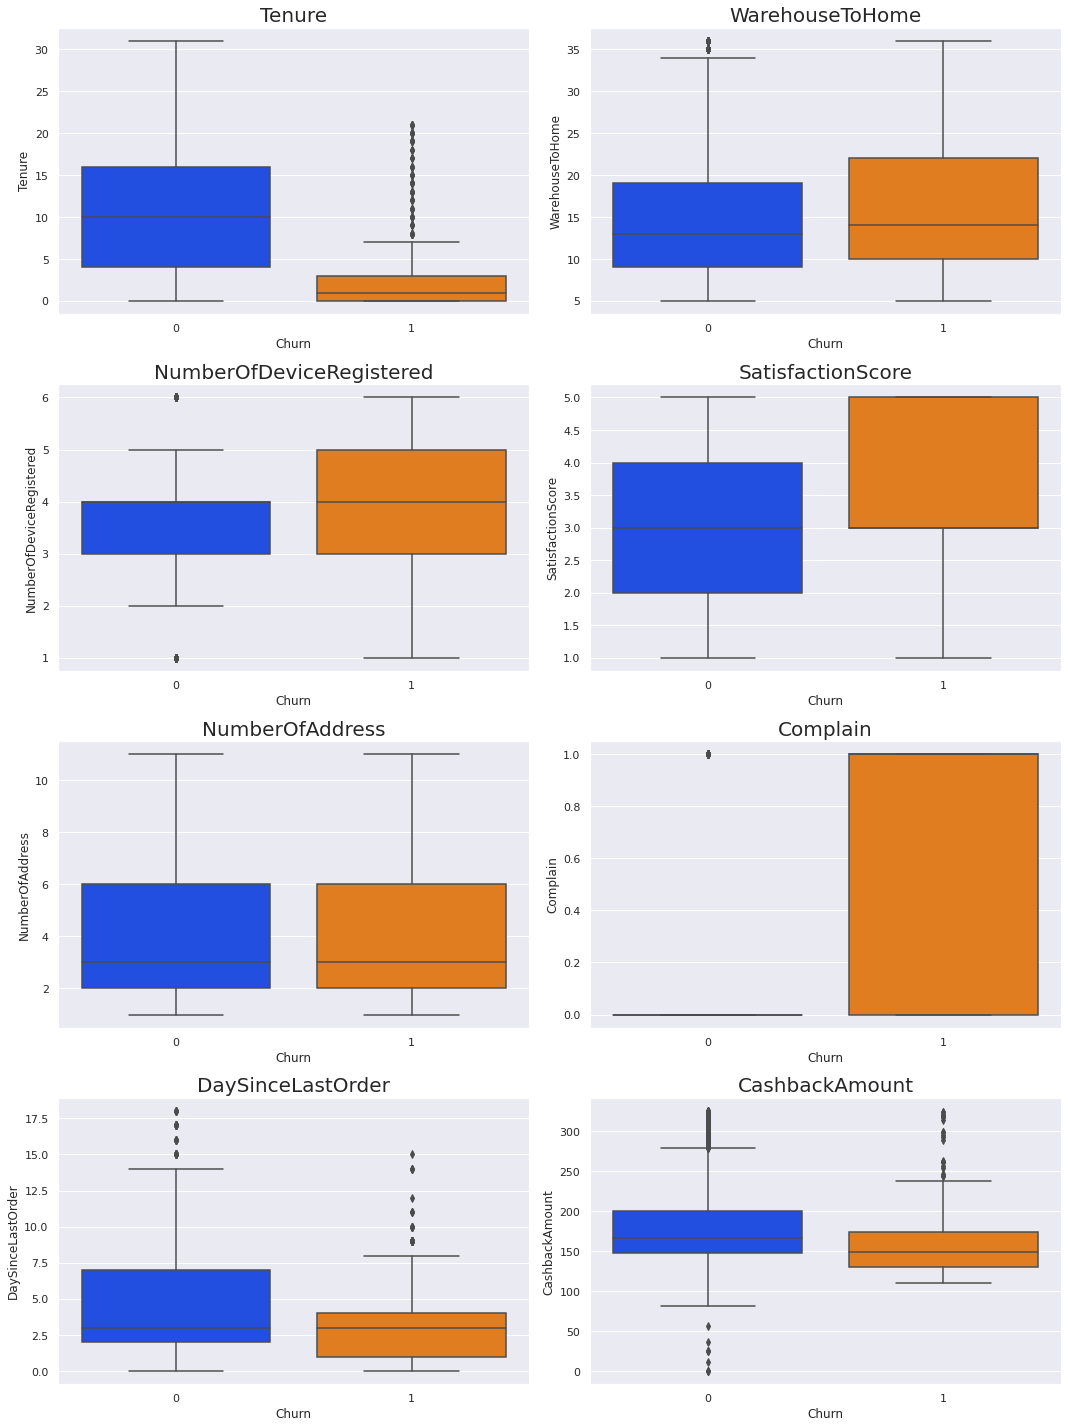

In [92]:
plt.figure(figsize=(15, 20))
sns.set(palette='bright')
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(4, 2, plotnumber)
    sns.boxplot(data=df,y=feature, x='Churn')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout();

## Data Analysis

### Numerical Features

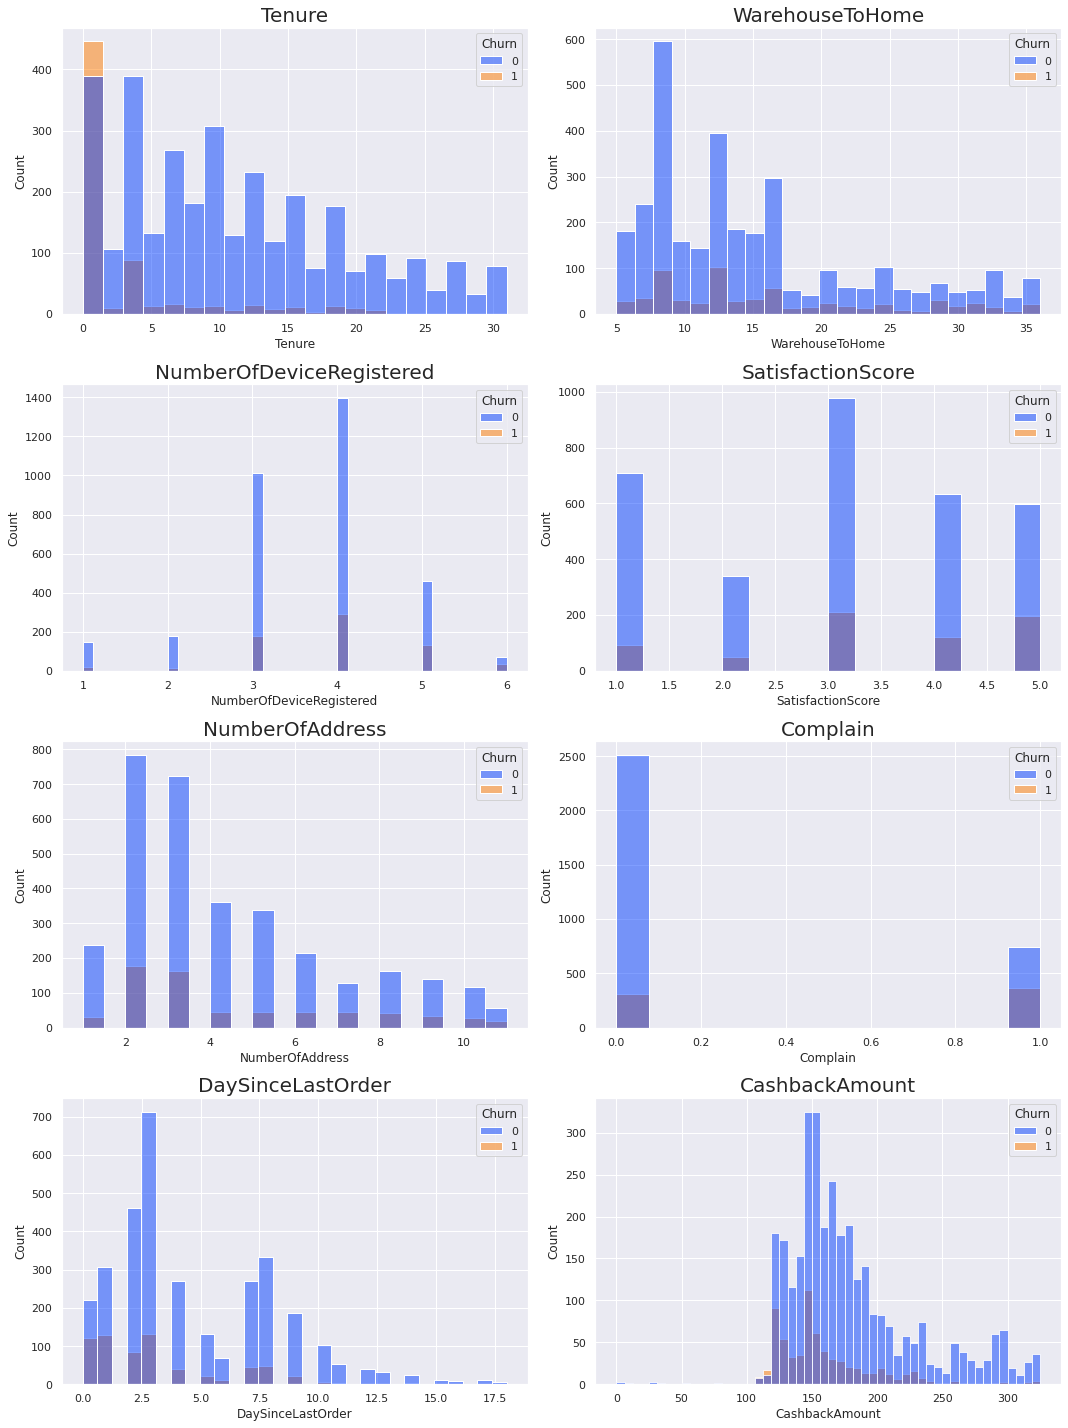

In [93]:
# Histogram Setiap Fitur
plt.figure(figsize=(15, 20))
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(4, 2, plotnumber)
    sns.histplot(data=df,x=feature,hue='Churn')
    plt.title(feature, fontsize=20)
    plotnumber += 1
    plt.tight_layout();

Berdasarkan histogram di atas, kita dapat menyimpulkan bahwa terlihat perbedaan distribusi `CashbackAmount`, `Tenure`, dan `Complain` dari pelanggan yang tidak churn (nilainya 0) dan pelanggan yang churn (nilainya 1)
- Pada distribusi `CashbackAmount` dan `Tenure`, pelanggan yang churn condong nilai fiturnya lebih rendah dari pelanggan yang tidak churn. 
- Sebaliknya pada distribusi `Complain`, pelanggan yang churn condong nilai fiturnya lebih tinggi dari pelanggan yang tidak churn.

Sedangkan untuk distribusi fitur lainnya kurang lebih sama antara target 0 dan 1. Di mana berarti kemungkinan nilainya tidak mempengaruhi seorang kandidat jadi tertarik dan tidaknya.

In [94]:
# Persentase Pelanggan Churn dan Tidak Churn
df['Churn'].value_counts()

0    3258
1     672
Name: Churn, dtype: int64

In [95]:
df.dropna()['Churn'].value_counts()

0    3258
1     672
Name: Churn, dtype: int64

In [96]:
df['Churn'].value_counts()/len(df) * 100

0    82.900763
1    17.099237
Name: Churn, dtype: float64

In [97]:
df.dropna()['Churn'].value_counts()/len(df.dropna()['Churn']) * 100

0    82.900763
1    17.099237
Name: Churn, dtype: float64

Data kita termasuk ke jenis Imbalance Data sehingga perlu dilakukan treatment untuk Imbalance Classification nanti. 

Terlihat bahwa distribusi kolom target kita kurang lebih sama seperti sebelum data yang kosong dihapus.

Mari sekarang kita check juga distribusi data kolom categorical kita

### Categorical Features

In [98]:
df.describe(include=['O'])

,PreferedOrderCat,MaritalStatus
count,3930,3930
unique,6,3
top,Laptop & Accessory,Married
freq,1454,2049


In [99]:
df.dropna().describe(include=['O'])

,PreferedOrderCat,MaritalStatus
count,3930,3930
unique,6,3
top,Laptop & Accessory,Married
freq,1454,2049


In [100]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [101]:
df.dropna()['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [102]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [103]:
df.dropna()['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

Data kosong pada fitur kategorikal menyebar secara rata sehingga tidak ada value yang hilang dari fitur kategorikal ketika data kosongnya dihapus.

# Part 3 : Feature Engineering

## Data Preparation

In [104]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


Sekarang mari kita melakukan fitur encoding untuk fitur2 categorical yang kita miliki.
Yang akan kita lakukan adalah :

1. Merubah fitur/kolom `PreferedOrderCat` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah fitur/kolom `MaritalStatus` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.

In [106]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

In [105]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat','MaritalStatus'])
], remainder='passthrough')

# Part 4: Modelling and Evaluation

In [110]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

## Modelling

### Model Benchmarking : K-Fold

In [111]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score=[]
rata=[]
std=[]

for i in models:
    skfold=StratifiedKFold(n_splits=5)
    estimator=Pipeline([
        ('preprocess',transformer),
        # ('scaler',scaler),
        ('model',i)])
    model_cv=cross_val_score(estimator,X_train,y_train,cv=skfold,scoring='f1')
    score.append(model_cv)
    rata.append(model_cv.mean())
    std.append(model_cv.std())
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],'mean f1_score':rata,'sdev':std}).set_index('model').sort_values(by='mean f1_score',ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,mean f1_score,sdev
model,,
LightGBM,0.795712,0.019675
Random Forest,0.786080,0.034014
Decision Tree,0.751564,0.024772
XGBoost,0.682074,0.043350
Logistic Regression,0.584946,0.054401
KNN,0.483639,0.024509


Terlihat bahwa model LightGBM adalah yang terbaik untuk f1 scorenya dari setiap model yang menggunakan default hyperparameter. LightGBM juga memiliki rata-rata standar deviasi yang paling rendah sehingga membuatnya menjadi model paling konsisten dibanding model lainnya.

### Model Benchmarking : Test Data

In [112]:
models = [logreg,knn,dt,rf,xgb,lgbm]
score_f1 = []

def y_pred_func(i):
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',i)])
    X_train,X_test
    
    estimator.fit(X_train,y_train)
    return(estimator,estimator.predict(X_test),X_test)

for i,j in zip(models, ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM']):
    estimator,y_pred,X_test = y_pred_func(i)
    score_f1.append(f1_score(y_test,y_pred))
    print(j,'\n', classification_report(y_test,y_pred))
    
pd.DataFrame({'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost','LightGBM'],
             'f1 score':score_f1}).set_index('model').sort_values(by='f1 score',ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression 
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       652
           1       0.76      0.45      0.56       134

    accuracy                           0.88       786
   macro avg       0.83      0.71      0.75       786
weighted avg       0.87      0.88      0.87       786

KNN 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       652
           1       0.56      0.37      0.45       134

    accuracy                           0.84       786
   macro avg       0.72      0.66      0.68       786
weighted avg       0.82      0.84      0.83       786

Decision Tree 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       652
           1       0.80      0.76      0.78       134

    accuracy                           0.93       786
   macro avg       0.87      0.86      0.87       786
weighted avg       0.93      0

,f1 score
model,
Random Forest,0.786885
Decision Tree,0.778626
LightGBM,0.773438
XGBoost,0.649573
Logistic Regression,0.563380
KNN,0.446429


Terlihat perubahan performa di mana Decision Tree menjadi model terbaik untuk test data. Namun mempertimbangkan model LightGBM yang f1 scorenya tidak terlalu jauh dengan standar deviasi yang sangat rendah, maka dipilihlah LightGBM sebagai model machine learning untuk dataset ini.

Mari sekarang kita coba melakukan oversampling untuk model LightGBM kita untuk melihat apakah kita dapat mendapatkan hasil yang lebih baik lagi.

## Oversampling

### Test Oversampling with K-Fold Cross Validation

In [113]:
def calc_train_error(X_train, y_train, model):
#     '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    accuracy = accuracy_score(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    recall = recall_score(y_train, predictions)
    precision = precision_score(y_train, predictions)
    report = classification_report(y_train, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_validation_error(X_test, y_test, model):
#     '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    recall = recall_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    return { 
        'report': report, 
        'f1' : f1, 
        'roc': roc_auc, 
        'accuracy': accuracy,
        'recall': recall,
        'precision': precision
    }
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
#     '''fits model and returns the in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [114]:
from sklearn.model_selection import StratifiedKFold

K = 10
kf = StratifiedKFold(n_splits=K, shuffle=True, random_state=0)

In [115]:
data = X_train
target = y_train

In [116]:
train_errors_without_oversampling = []
validation_errors_without_oversampling = []

train_errors_with_oversampling = []
validation_errors_with_oversampling = []

for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    Y_train, Y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(X_val), (len(X_train) + len(X_val)))
    ros = RandomOverSampler()

    X_ros, Y_ros = ros.fit_resample(X_train, Y_train)

    # instantiate model
    lgbm = lgb.LGBMClassifier()
    estimator=Pipeline([
        ('preprocess',transformer),
        ('model',lgbm)
    ])

    #calculate errors
    train_error_without_oversampling, val_error_without_oversampling = calc_metrics(X_train, Y_train, X_val, Y_val, estimator)
    train_error_with_oversampling, val_error_with_oversampling = calc_metrics(X_ros, Y_ros, X_val, Y_val, estimator)
    
    # append to appropriate list
    train_errors_without_oversampling.append(train_error_without_oversampling)
    validation_errors_without_oversampling.append(val_error_without_oversampling)
    
    train_errors_with_oversampling.append(train_error_with_oversampling)
    validation_errors_with_oversampling.append(val_error_with_oversampling)

#### Evaluation Metrics Without Oversampling

In [117]:
listItem = []

for tr,val in zip(train_errors_without_oversampling,validation_errors_without_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.995405,0.930159,0.999892,0.967575,0.991852,0.878846,0.979339,0.814815,0.993711,0.785714
1,0.993991,0.958730,0.999798,0.976089,0.989381,0.923356,0.979339,0.814815,0.985447,0.936170
2,0.994344,0.939683,0.999807,0.960125,0.989997,0.887982,0.979339,0.759259,0.987500,0.872340
3,0.994344,0.942857,0.999666,0.980204,0.989964,0.903611,0.975207,0.888889,0.991597,0.800000
4,0.996466,0.920382,0.999895,0.933203,0.993769,0.852518,0.987629,0.716981,0.991718,0.791667
5,0.994700,0.939490,0.999852,0.961903,0.990615,0.889672,0.977320,0.792453,0.991632,0.840000
6,0.996466,0.920382,0.999859,0.938746,0.993759,0.850108,0.987603,0.685185,0.991701,0.822222
7,0.992933,0.955414,0.999783,0.970299,0.987456,0.918065,0.971074,0.814815,0.987395,0.916667
8,0.993640,0.955414,0.999764,0.978704,0.988729,0.913925,0.975207,0.759259,0.987448,0.976190
9,0.994346,0.949045,0.999836,0.973077,0.989965,0.909203,0.975207,0.833333,0.991597,0.865385


#### Evaluation Metrics With Oversampling

In [118]:
listItem = []

for tr,val in zip(train_errors_with_oversampling,validation_errors_with_oversampling) :
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],
                     tr['recall'],val['recall'],tr['precision'],val['precision']])

listItem.append(list(np.mean(listItem,axis=0)))
    
dfEvaluate = pd.DataFrame(listItem, 
                    columns=['Train Accuracy', 
                            'Test Accuracy', 
                            'Train ROC AUC', 
                            'Test ROC AUC', 
                            'Train F1 Score',
                            'Test F1 Score',
                            'Train Recall',
                            'Test Recall',
                            'Train Precision',
                            'Test Precision'])

listIndex = list(dfEvaluate.index)
listIndex[-1] = 'Average'
dfEvaluate.index = listIndex
dfEvaluate

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Recall,Test Recall,Train Precision,Test Precision
0,0.994456,0.936508,0.999909,0.974670,0.994456,0.895723,0.999147,0.907407,0.989861,0.765625
1,0.992751,0.949206,0.999855,0.973464,0.992750,0.911888,1.000000,0.870370,0.985708,0.839286
2,0.994243,0.930159,0.999881,0.957783,0.994243,0.880550,0.999147,0.833333,0.989443,0.775862
3,0.993603,0.939683,0.999912,0.985526,0.993603,0.905188,0.999574,0.981481,0.987779,0.746479
4,0.994243,0.904459,0.999925,0.919396,0.994243,0.834679,1.000000,0.754717,0.988617,0.701754
5,0.993603,0.920382,0.999909,0.970433,0.993603,0.868701,0.999574,0.867925,0.987779,0.718750
6,0.995098,0.929936,0.999907,0.943376,0.995098,0.876994,1.000000,0.796296,0.990291,0.796296
7,0.993606,0.939490,0.999774,0.966311,0.993606,0.900212,0.999574,0.907407,0.987784,0.777778
8,0.993393,0.945860,0.999924,0.984330,0.993393,0.908274,0.999574,0.888889,0.987368,0.813559
9,0.992114,0.936306,0.999796,0.966524,0.992114,0.891334,0.998721,0.851852,0.985696,0.793103


Terlihat bahwa hasil evaluation metricsnya untuk recall dari class positive lebih baik setelah di oversampling dari yang tidak di oversampling tetapi precisionnya tebakan class positive menjadi sedikit lebih buruk. 

Ini masuk akal karena class positive datanya kita perbanyak menjadi sama dengan jumlah data dari class negative, dimana ini biasa memang akan membuat recall dari class yg minoritas naik tetapi otomatis biasa precisionnya juga akan turun sebagai dampaknya. Tetapi untuk kasus kali ini recallnya naik sedikit lebih tinggi dari pada precisionnya yang turun. Dan dampak ini terhadap kasus permasalahan kita berarti model kita setelah di oversampling, menjadi mendapatkan potensial kandidat yang lebih banyak dari sebelumnya, tetapi sedikit berkurang dalam ketepatan/precision tebakannya untuk kandidat potensial, yang menyebabkan cost biaya recruitment yang terbuang menjadi lebih tinggi dari model yang tidak di oversampling.

Recall lebih penting jika False Negative lebih mahal daripada False Positive. Sedangkan Precision lebih penting jika False Positive lebih mahal daripada False Negative. Untuk kasus ini, pelanggan tidak churn yang dideteksi sebagai churn (False Positive) lebih beresiko daripada pelanggan churn yang dideteksi sebagai tidak churn (False Negative). Maka dari itu, precision lebih penting untuk ditingkatkan untuk kasus ini dan model yang dipilih adalah model tanpa oversampling

## Hyperparameter Tuning

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=0)

lgbm = lgb.LGBMClassifier()

estimator=Pipeline([
    ('preprocess',transformer),
    ('model',lgbm)
])

In [120]:
hyperparam_space=[{
    'model__max_bin': [255, 275, 300],
    'model__num_leaves':[31, 21, 41],
    'model__min_data_in_leaf': [20, 15, 30],
    'model__num_iterations':[100, 75, 125],
    'model__learning_rate': [0.1, 0.075, 0.125],
    'model__random_state': [0]
}]

default hyperparameter LGBM => `max_bin` = 255, `num_leaves` = 31, `min_data_in_leaf` = 20, `num_iterations` = 100, `learning_rate` = 0.1

In [121]:
grid = GridSearchCV(estimator, n_jobs=-1, param_grid=hyperparam_space, scoring='f1', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state = 0))

In [122]:
grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['PreferedOrderCat',
                                                                          'MaritalStatus'])])),
                                       ('model', LGBMClassifier())]),
             n_jobs=-1,
             param_grid=[{'model__learning_rate': [0.1, 0.075, 0.125],
                          'model__max_bin': [255, 275, 300],
                          'model__min_data_in_leaf': [20, 15, 30],
                          'model__num_iterations': [100, 75, 125],
                          'model__num_leaves': [31, 

In [123]:
# score terbaik hasil dari grid_search
print(grid.best_score_)

# hyperparameter pada score terbaik hasil dari grid_search
print(grid.best_params_)

# proses secara keseluruhan dengan model terbaik dan parameter terbaik
print(grid.best_estimator_)

0.8408915534560386
{'model__learning_rate': 0.125, 'model__max_bin': 275, 'model__min_data_in_leaf': 20, 'model__num_iterations': 100, 'model__num_leaves': 41, 'model__random_state': 0}
Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=275,
                                min_data_in_leaf=20, num_iterations=100,
                                num_leaves=41, random_state=0))])


In [124]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model',
                 LGBMClassifier(learning_rate=0.125, max_bin=275,
                                min_data_in_leaf=20, num_iterations=100,
                                num_leaves=41, random_state=0))])

In [125]:
estimator=Pipeline([
    ('preprocess',transformer),
    ('model',lgbm)
])
estimator.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('model', LGBMClassifier())])

In [126]:
y_pred_default = estimator.predict(X_test)
y_pred_tuned = best_model.predict(X_test)

f1_default = f1_score(y_test, y_pred_default)
f1_tuned = f1_score(y_test, y_pred_tuned)

print('F1 Score Default LGBM : ', f1_default)
print('F1 Score Tuned LGBM : ', f1_tuned)

F1 Score Default LGBM :  0.7734375
F1 Score Tuned LGBM :  0.8153846153846153


In [127]:
report_default = classification_report(y_test, y_pred_default)
report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Default LGBM : \n', report_default)
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Default LGBM : 
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       652
           1       0.81      0.74      0.77       134

    accuracy                           0.93       786
   macro avg       0.88      0.85      0.86       786
weighted avg       0.92      0.93      0.92       786

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       652
           1       0.84      0.79      0.82       134

    accuracy                           0.94       786
   macro avg       0.90      0.88      0.89       786
weighted avg       0.94      0.94      0.94       786



## Feature Importance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


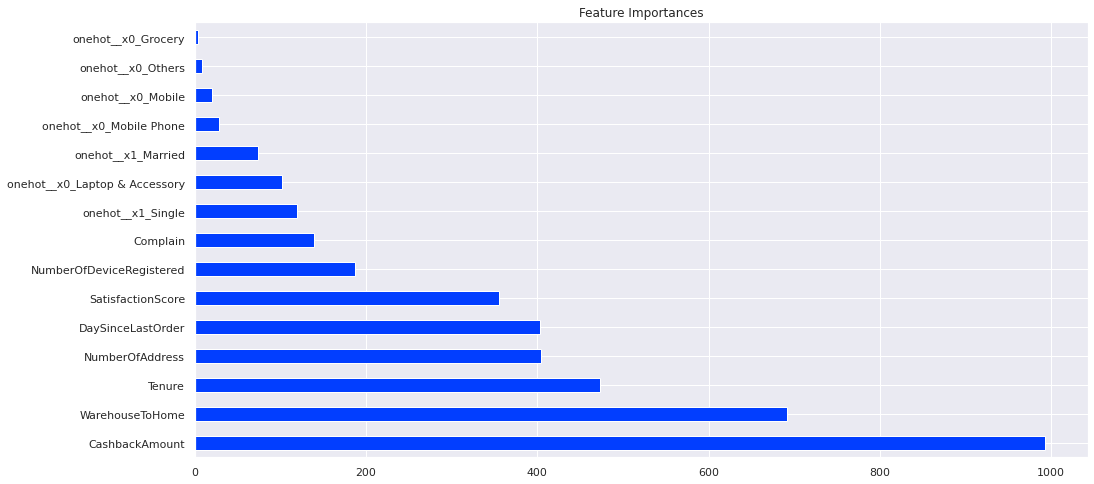

In [128]:
coef1 = pd.Series(best_model['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False)
plt.figure(figsize=(16,8))
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Terlihat bahwa ternyata untuk model LGBM kita, fitur `CashbackAmount` adalah yang paling penting, kemudian diikuti dengan `WarehouseToHome`, `Tenure`, dan selanjutnya. Sedangkan untuk fitur yang paling tidak penting dalam model ini adalah fitur-fitur kategorikal yaitu `MaritalStatus` dan `PreferedOrderCat`.

## Saving Model

In [129]:
#saving model with pickle
import pickle
pickle.dump(best_model, open('model_lgbm.sav', 'wb'))

# Part 5 : Conclusion and Recommendation

## Conclusion

In [130]:
print('Classification Report Tuned LGBM : \n', report_tuned)

Classification Report Tuned LGBM : 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       652
           1       0.84      0.79      0.82       134

    accuracy                           0.94       786
   macro avg       0.90      0.88      0.89       786
weighted avg       0.94      0.94      0.94       786



Berdasarkan hasil classification report dari model, dapat disimpulkan bahwa; bila seandainya nanti digunakan model ini untuk memfilter list pelanggan yang akan coba ditawarkan promosi, maka model ini dapat mengurangi 97% kandidat yang tidak churn untuk tidak di-approach, dan model ini dapat menangkap 79% pelanggan yang churn dari seluruh kandidat yang tertarik.

Model ini memiliki ketepatan prediksi pelanggan yang churn sebesar 84%. Artinya, setiap model ini memprediksi bahwa seorang pelanggan akan churn, maka kemungkinan tebakannya benar itu sebesar 84% kurang lebih. Masih akan ada pelanggan yang tidak akan churn tetapi diprediksi sebagai pelanggan yang akan churn sekitar 3% dari keseluruhan pelanggan yang tidak churn.

Bila seandainya: 
- Biaya untuk promosi per pelanggan itu 10$
- Setiap mempertahankan 5% pelanggan yang akan churn itu mendapatkan keuntungan sebanyak 60% (berdasarkan sumber dari Harvard Business School: https://hbswk.hbs.edu/archive/the-economics-of-e-loyalty)
- Andaikan jumlah pelanggan sebanyak 500 orang (100 pelanggan akan churn, 400 pelanggan tidak akan churn)

Maka hitungannya kurang lebih akan seperti ini :

Tanpa Model (semua pelanggan diberikan promosi) :
- Total Biaya => 500 x 10 USD = 5000 USD
- Total pelanggan akan churn yang didapatkan => 100 orang (karena semua kita tawarkan)
- Total pelanggan akan churn yang tidak didapatkan => 0 orang (karena semua kita tawarkan)
- Biaya yang terbuang => 400 x 10 USD = 4000 USD (karena 400 orang dipromosikan sia-sia karena tidak akan churn)
- Jumlah penghematan => 0 USD

Dengan Model (hanya pelanggan yang diprediksi oleh model akan churn yang diberikan promosi) :
- Total Biaya => (79 x 10 USD) + (12 x 10 USD) = 790 USD + 120 USD = 910 USD
- Total pelanggan akan churn yang didapatkan => 79 orang (karena recall 1 atau yang akan churn itu 79%)
- Total pelanggan akan churn yang tidak didapatkan => 21 orang (karena recall 1 atau yang akan churn itu 79%, sisanya 21%)
- Biaya yang terbuang => 12 x 10 USD = 120 USD (3% dari 400 atau 12 orang diberikan promosi tapi semulanya memang tidak akan churn)
- Jumlah penghematan => 910 - 30 USD = 880 USD

Dengan mengorbankan customer churn sebanyak 21%. Model ini mengkompensasi dengan penghematan biaya sebesar 4090 USD atau 81.8% penghematan biaya. 

Berdasarkan contoh hitungan tersebut, terlihat bahwa dengan menggunakan model ini, maka perusahaan tersebut akan menghemat biaya yang cukup besar tanpa mengorbankan terlalu banyak customer retention.

## Recommendation

Hal-hal yang bisa dilakukan untuk mengurangi masalah customer churn antara lain:
- Memberikan promo khusus kepada pelanggan yang memiliki masa tenure rendah untuk mencegah potensi churn terhadap pelanggan baru.
- Membuka cabang warehouse lebih banyak sehingga lebih dekat ke pemukiman rumah-rumah pelanggan.
- Mengoptimalkan harga cashback untuk meningkatkan customer retention tanpa resiko kerugian yang besar.
- Mengoptimalkan user experience dan customer service dari aplikasi atau website e-commerce untuk dapat melayani complain pelanggan dengan baik.
- Memberikan promo khusus kepada pelanggan yang sudah lama tidak bertransaksi.

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:
- Penghapusan fitur kategorikal untuk pemodelan ulang tanpa fitur yang tidak terlalu berpengaruh ke model.
- Penggunaan grid search karena grid search menjamin hasil yang terbaik saat melakukan hyperparameter tuning dengan hyperparameter yang lebih banyak.
- Menambahkan fitur-fitur baru yang dapat berguna untuk analisis dan pemodelan seperti lama penggunaan aplikasi atau website, jumlah produk yang berada dalam keranjang pelanggan, dan sebagainya.